**Intorduction to Pytorch**

Pytorch is a python library which simplies building and training Neural Networks and all sorts of Deep Learning algorithms.




In [ ]:
import torch

**Tensors**

Tensor is a generalization to matrix. Matrix can store data in a 2D array. Each piece of data, then, will be retrievable by providing two indices (i,j)

For an n-dimensional tensor, we need #n indices to access each piece of data.


$ i_1, i_2, ..., i_n$



In [ ]:
a = [[1,2,3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]

a_tensor = torch.tensor(a)  ## *1

print(a_tensor)
print(a_tensor.shape)   ## *2

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
torch.Size([4, 3])


*1 You can build a tensor-copy of a nested list using ``` torch.tensor() ```. This method also accepts a numpy array as its input.

*2 you can find the shape of a tensor this way

Some useful commands for creating tensors

In [ ]:
A = torch.ones([3,4])

B = torch.zeros([5,2])

C = torch.randn([2, 4)

print(A)
print(B)
print(C)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[-0.8771,  1.0211,  1.5954, -1.1234],
        [-0.7879, -0.5985, -1.7385,  1.6072]])


You can build tensors like other

In [ ]:
D = torch.zeros_like(A)
E = torch.rand_like(B)
F = torch.ones_like(C)

print(D)
print(E)
print(F)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.8223, 0.8897],
        [0.4585, 0.7811],
        [0.9313, 0.7332],
        [0.5342, 0.6623],
        [0.8592, 0.8303]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])


**Mathematical Operations**

In [ ]:
a = torch.tensor([[1, 2, 3], [4, 5, 6]])
b = torch.tensor([[1, 0.5, 1/3], [1/4, 1/5, -6]])

print("* is element-wise multiplication \n", a*b)



* is element-wise multiplication 
 tensor([[  1.,   1.,   1.],
        [  1.,   1., -36.]])


In [ ]:
a = torch.rand([4, 5])
b = torch.rand([5, 3])
c = torch.zeros([4, 3])
print(" \n @ is matrix multiplication \n", a @ b,'\n')
print("torch.matmul is also matrix multiplication \n", torch.matmul(a, b))

 
 @ is matrix multiplication 
 tensor([[1.6632, 2.1277, 1.7064],
        [1.2494, 1.8636, 0.9285],
        [1.0441, 1.7419, 1.1967],
        [0.4515, 0.8587, 0.5541]]) 

torch.matmul is also matrix multiplication 
 tensor([[1.6632, 2.1277, 1.7064],
        [1.2494, 1.8636, 0.9285],
        [1.0441, 1.7419, 1.1967],
        [0.4515, 0.8587, 0.5541]])


Often we have multidimensional tensors

In [ ]:
a = torch.rand(2, 3, 4, 5)
b = torch.rand(2, 3, 5, 6)

print(" \n torch.matmul can handle batch multiplication \n", torch.matmul(a, b).shape,'\n')

 
 torch.matmul can handle batch multiplication 
 torch.Size([2, 3, 4, 6]) 



We can get the average

In [ ]:
print("Shape of a: ",a.shape)
print("Average of a: ", a.mean())

print("Average of a along the first dimension: ", a.mean(dim=0, keepdim = True).shape)
print("Average of a along the 2nd dimension: ", a.mean(dim=1, keepdim = True).shape)
print("Average of a along the 3rd dimension: ", a.mean(dim=2).shape)
print("Average of a along the 4th dimension: ", a.mean(dim=3).shape)

print("Average of a along the last dimension: ", a.mean(dim=-1).shape)



Shape of a:  torch.Size([2, 3, 4, 5])
Average of a:  tensor(0.5177)
Average of a along the first dimension:  torch.Size([1, 3, 4, 5])
Average of a along the 2nd dimension:  torch.Size([2, 1, 4, 5])
Average of a along the 3rd dimension:  torch.Size([2, 3, 5])
Average of a along the 4th dimension:  torch.Size([2, 3, 4])
Average of a along the last dimension:  torch.Size([2, 3, 4])


You can see that averaging drops one dimension. That often makes sense but sometimes we want to normalize the tensor therefore we need to keep the dims to be able to do element-wise math operation

In [ ]:
a = torch.randn(2,3,4)

a_normalized = a - a.mean(dim=1)



RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

error because the shapes don't match because the averaged version has dropped one dim

In [ ]:
a_normalized = a - a.mean(dim=1, keepdim=True)

a_normalized = a / a.std(dim=1, keepdim=True)


tensor([[[-1.5510,  2.3823,  0.9624, -2.1748],
         [-0.1047,  0.7327,  1.2045, -0.9762],
         [ 0.3684,  2.5368, -0.6359, -0.1890]],

        [[ 0.4600,  0.0372, -0.1707, -0.5404],
         [-0.9532, -0.8247,  1.3279,  1.2121],
         [ 0.9791,  1.1692,  1.7256, -0.4988]]])


We can reshape the tensors

In [ ]:
a = torch.randn([2,3,3,5])

## Let's unroll the matrices into vectors of size 15



b = a.view(2,3, 15)

print(b.shape)

c = b.view(6, 15)

print(c.shape)

d = c.view(3,2, 15).view(3, 2, 5, -1)      ## We can use -1 to infer the remaining dimension, obviously the numbers must match


print(d.shape)


## We can permute the tensor dimensions

## let's say [3, 2, 5, 3]  -->  [5, 3, 2, 3]

e = d.permute([2, 0, 1, 3])

print(e.shape)

torch.Size([2, 3, 15])
torch.Size([6, 15])
torch.Size([3, 2, 5, 3])
torch.Size([5, 3, 2, 3])


MNIST Classification example

Dataset description

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 11.1 Data Preparation
transform = transforms.Compose([
    transforms.ToTensor(),               # convert to [0,1] tensor
    transforms.Normalize((0.1307,), (0.3081,))  # normalize mean & std
])

train_dataset = datasets.MNIST(root='mnist_data/', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='mnist_data/', train=False, download=True, transform=transform)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)



100%|██████████| 9.91M/9.91M [00:00<00:00, 56.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.74MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.47MB/s]


In [ ]:
for x, y in train_loader:
    print("Input shape: ",x.shape,"Output Shape: ", y.shape)
    break


Input shape:  torch.Size([64, 1, 28, 28]) Output Shape:  torch.Size([64])


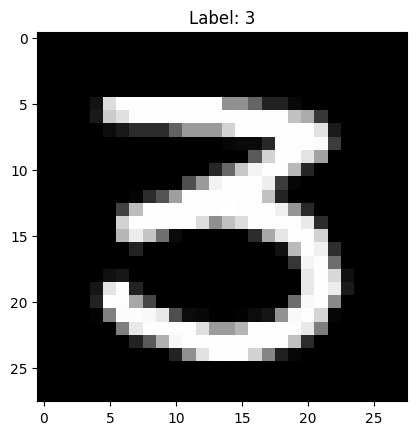

In [ ]:
## Now i want to display and plot one of these examples:

plt.imshow(x[43].squeeze(), cmap='gray')
plt.title(f"Label: {y[43].item()}")
plt.show()

Model Description

In [ ]:
# 11.2 Model Definition

class MNISTNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.relu = nn.ReLU()

        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)


    def forward(self, x):
        x = self.flatten(x)
        print("Shape after flattening", x.shape)
        x = self.relu(self.fc1(x))
        print("Shape after relu", x.shape)
        return self.fc2(x)  # logits for 10 classes


model = MNISTNet()



Let's see what happens to data after being passed to model

In [ ]:
for x, y in train_loader:
    print("Input shape: ",x.shape,"Output Shape: ", y.shape)

    output = model(x)

    print("output shape: ", output.shape)
    break

Input shape:  torch.Size([64, 1, 28, 28]) Output Shape:  torch.Size([64])
Shape after flattening torch.Size([64, 784])
Shape after relu torch.Size([64, 128])
output shape:  torch.Size([64, 10])


Why does labels in the dataset have different shape from the model's output?

In [ ]:
print(y[43])
print(output[43])

tensor(6)
tensor([-0.6700, -0.0329, -0.0606, -0.6214,  0.3299,  0.1964, -0.3707,  0.1383,
        -0.1905,  0.2671], grad_fn=<SelectBackward0>)


Streaming output truncated to the last 5000 lines.
Shape after flattening torch.Size([64, 784])
Shape after relu torch.Size([64, 128])
Shape after flattening torch.Size([64, 784])
Shape after relu torch.Size([64, 128])
Shape after flattening torch.Size([64, 784])
Shape after relu torch.Size([64, 128])
Shape after flattening torch.Size([64, 784])
Shape after relu torch.Size([64, 128])
Shape after flattening torch.Size([64, 784])
Shape after relu torch.Size([64, 128])
Shape after flattening torch.Size([64, 784])
Shape after relu torch.Size([64, 128])
Shape after flattening torch.Size([64, 784])
Shape after relu torch.Size([64, 128])
Shape after flattening torch.Size([64, 784])
Shape after relu torch.Size([64, 128])
Shape after flattening torch.Size([64, 784])
Shape after relu torch.Size([64, 128])
Shape after flattening torch.Size([64, 784])
Shape after relu torch.Size([64, 128])
Shape after flattening torch.Size([64, 784])
Shape after relu torch.Size([64, 128])
Shape after flattening to

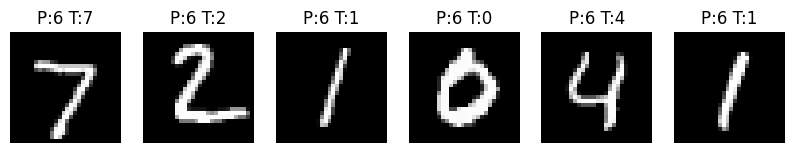

In [ ]:
# 11.3 Loss and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
epochs = 5

# 11.4 Training Loop
for epoch in range(1, epochs+1):
    model.train()
    total_loss = 0.0
    for X_batch, y_batch in train_loader:

        logits = model(X_batch)
        loss = loss_fn(logits, y_batch)

        loss.backward()
        optimizer.step()
        total_loss += loss.item() * X_batch.size(0)
    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {epoch}, Training loss: {avg_loss:.4f}")

# 11.5 Evaluation
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        logits = model(X_batch)
        preds = logits.argmax(dim=1)
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy*100:.2f}%")

# 11.6 Visualize Predictions
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
with torch.no_grad():
    example_logits = model(example_data)
    example_preds = example_logits.argmax(dim=1)

fig, axes = plt.subplots(1, 6, figsize=(10,2))
for i in range(6):
    axes[i].imshow(example_data[i].squeeze(), cmap='gray')
    axes[i].set_title(f"P:{example_preds[i].item()} T:{example_targets[i].item()}")
    axes[i].axis('off')
plt.show()

**LSTM and language modeling**

Text Data preparation

In [ ]:
#Load custom text corpus from a local file
with open('corpus.txt', 'r', encoding='utf-8') as f:
    data = f.read().lower()

# 12.1.2 Clean up non-printable characters
data = ''.join(ch for ch in data if ch.isprintable())
print(f"Corpus length: {len(data)} characters")

Corpus length: 1424 characters


In [ ]:
# 12.1.3 Hyperparameters for sequence modeling
seq_len = 10    # length of each input sequence
batch_size = 2  # number of sequences per batch
epochs = 5    # training epochs
lr = 0.01        # learning rate

In [ ]:
# Build char-to-index and index-to-char mappings
chars = sorted(list(set(data)))
vocab_size = len(chars)
print("vocabulary size: ", vocab_size)
char2idx = {ch:i for i,ch in enumerate(chars)}
idx2char = {i:ch for i,ch in enumerate(chars)}

# Encode entire dataset as indices
data_indices = torch.tensor([char2idx[ch] for ch in data], dtype=torch.long)

vocabulary size:  33


Let's see the mappings

In [ ]:
print(char2idx)
print(idx2char)

{' ': 0, '(': 1, ')': 2, ',': 3, '-': 4, '.': 5, ':': 6, 'a': 7, 'b': 8, 'c': 9, 'd': 10, 'e': 11, 'f': 12, 'g': 13, 'h': 14, 'i': 15, 'j': 16, 'k': 17, 'l': 18, 'm': 19, 'n': 20, 'o': 21, 'p': 22, 'q': 23, 'r': 24, 's': 25, 't': 26, 'u': 27, 'v': 28, 'w': 29, 'x': 30, 'y': 31, 'z': 32}
{0: ' ', 1: '(', 2: ')', 3: ',', 4: '-', 5: '.', 6: ':', 7: 'a', 8: 'b', 9: 'c', 10: 'd', 11: 'e', 12: 'f', 13: 'g', 14: 'h', 15: 'i', 16: 'j', 17: 'k', 18: 'l', 19: 'm', 20: 'n', 21: 'o', 22: 'p', 23: 'q', 24: 'r', 25: 's', 26: 't', 27: 'u', 28: 'v', 29: 'w', 30: 'x', 31: 'y', 32: 'z'}


let's see the entire dataset but in tokenized version

In [ ]:
txt = ''
for i in data_indices:
  txt += idx2char[i.item()]

print(txt)


this course aims to build a good understanding on generative models, the state-of-the-art architectures and their applications. the course in designed in two major parts, wherein the first part the basic idea of data generation is introduced, and some mathematical foundations are provided. in this respect, the course looks at large language models as an initial generative model and discusses some advancement in this respect.the second part of the course gets into the three major approaches for designing a generative model: namely, generative adversarial networks (gans), variational autoencoders (vaes), and diffusion models.the course finally goes through some recent advancements in generative ai.backgrounds and requirements (prize)deep learning knowledgeto follow the contents of this course, a good understanding of machine learning models, particularly neural networks, is required. knowledge in more advanced topics like unsupervised learning methods, or newer architectures will be give

Creating Training Sequences

In [ ]:
# Prepare input and target batches
def get_batches(data_indices, seq_len, batch_size):

    num_batches = (len(data_indices) - 1) // (seq_len * batch_size)
    data_trim = data_indices[:num_batches * batch_size * seq_len + 1]
    x = data_trim[:-1].view(batch_size, -1)
    y = data_trim[1: ].view(batch_size, -1)

    out = []
    for i in range(0, x.size(1), seq_len):
        yield x[:, i:i+seq_len], y[:, i:i+seq_len]



# 12.1.3 Hyperparameters for sequence modeling
seq_len = 10    # length of each input sequence
batch_size = 2  # number of sequences per batch
epochs = 5    # training epochs
lr = 0.01        # learning rate

LSTM Model

In [ ]:
import torch.nn as nn
class CharRNN(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers=1):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.fc   = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, prev_state):
        x = self.embed(x)                     # [B, T, E]
        out, state = self.lstm(x, prev_state) # out: [B, T, H]
        logits = self.fc(out)                 # [B, T, V]
        return logits, state

    def init_state(self, batch_size):
        # Initialize hidden and cell states with zeros
        return (torch.zeros(1, batch_size, hidden_size),
                torch.zeros(1, batch_size, hidden_size))

# Hyperparams
embed_size = 4
hidden_size = 10
model = CharRNN(vocab_size, embed_size, hidden_size)

Training Loop

In [ ]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

for epoch in range(1, epochs+1):
    state_h, state_c = model.init_state(batch_size)
    total_loss = 0
    for x_batch, y_batch in get_batches(data_indices, seq_len, batch_size):
        optimizer.zero_grad()
        logits, (state_h, state_c) = model(x_batch, (state_h, state_c))

        # reshape for loss: [B*T, V]
        loss = loss_fn(logits.reshape(-1, vocab_size), y_batch.reshape(-1))
        loss.backward()
        optimizer.step()

        # detach states to prevent backprop through entire history
        state_h = state_h.detach()
        state_c = state_c.detach()
        total_loss += loss.item()


    print(f"Epoch {epoch}/{epochs}, Loss: {total_loss/len(data)//seq_len:.4f}")

Epoch 1/5, Loss: 0.0000
Epoch 2/5, Loss: 0.0000
Epoch 3/5, Loss: 0.0000
Epoch 4/5, Loss: 0.0000
Epoch 5/5, Loss: 0.0000


Text generation

In [ ]:
# Generate text by sampling from the trained LM
def generate_text(model, start_str, length=100, temperature=1.0):
    model.eval()
    chars = list(start_str)
    state_h, state_c = model.init_state(1)

    # Warm-up with start string
    for ch in start_str[:-1]:
        idx = torch.tensor([[char2idx[ch]]])
        _, (state_h, state_c) = model(idx, (state_h, state_c))

    last_char = start_str[-1]
    result = start_str

    for _ in range(length):
        idx = torch.tensor([[char2idx[last_char]]])
        logits, (state_h, state_c) = model(idx, (state_h, state_c))
        # apply temperature
        probs = nn.functional.softmax(logits[0, -1] / temperature, dim=0)
        char_idx = torch.multinomial(probs, num_samples=1).item()
        last_char = idx2char[char_idx]
        result += last_char
    return result

# Example usage
generated = generate_text(model, start_str="hello pytorch", length=200, temperature=0.4)
print(generated)

hello pytorche ande as ar an me pn ine mhe ancon arn ge ante an ton an ang warein an arese me nan se pne ge che anrs al ante n arurence ares omon anile the and nin ans ans the se de arore arenars ar ar an n ar rod


**Using Huggingface transformers and tokenizers**

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# 13.1 Choose a Pythia model (e.g., 70M parameters)
model_name = 'EleutherAI/pythia-70m'

# 13.2 Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
# Pythia models may not define a pad token by default
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

model = AutoModelForCausalLM.from_pretrained(model_name)
model.eval()

# 13.3 Prepare prompt and tokenize
prompt = "Once upon a time in a distant land"
input_ids = tokenizer(prompt, return_tensors='pt').input_ids  # [1, seq_len]

# 13.4 Generate 20 new tokens
generated_ids = model.generate(
    input_ids,
    max_new_tokens=20,
    do_sample=True,
    top_k=50,
    top_p=0.95,
    temperature=1.0,
    pad_token_id=tokenizer.eos_token_id
)

# 13.5 Decode and display
generated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
print(generated_text)

RuntimeError: Failed to import transformers.models.auto.tokenization_auto because of the following error (look up to see its traceback):
Failed to import transformers.generation.utils because of the following error (look up to see its traceback):
No module named 'torch.sparse._triton_ops_meta'